In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset creditcard.csv
df=pd.read_csv("creditcard.csv")
#to display first 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


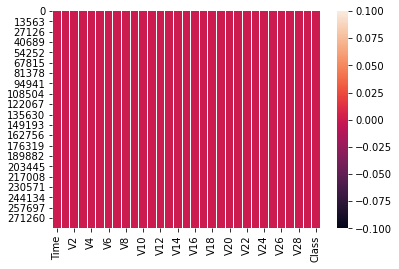

In [3]:
#Check null values
print(df.isnull().sum())
#visualise 
sns.heatmap(df.isnull())
plt.show()

In [6]:
df["Time"].unique

<bound method Series.unique of 0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64>

In [7]:
df["Amount"].unique

<bound method Series.unique of 0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

In [6]:
#check dataset is imbalance or not
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

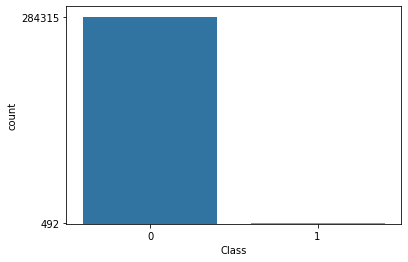

In [7]:
sns.countplot(data=df,x="Class")
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()

data is imbalance so apply sampling technique first then apply algorithm

In [8]:
#separate input and output variable from df dataframe: 
X=df.drop("Class",axis=1)
Y=df["Class"] 

In [9]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [11]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
#apply sampling technique 
#create object of  RandomOverSampler() class
ros = RandomOverSampler() 

In [12]:
#before apply randomoversampler
pd.Series(Y_train).value_counts() #check balance data 

0    199007
1       357
Name: Class, dtype: int64

In [13]:
#apply randomoversampling for balance
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [14]:
#after apply randomoversampler
pd.Series(Y_train1).value_counts() #check balance data

1    199007
0    199007
Name: Class, dtype: int64

In [15]:
#before apply randomoversampler ,check Y_test
pd.Series(Y_test).value_counts() #check if not balance

0    85308
1      135
Name: Class, dtype: int64

In [16]:
#apply randomoversampling for balance
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [17]:
#apply randomoversampler
pd.Series(Y_test1).value_counts() #check if not balance

1    85308
0    85308
Name: Class, dtype: int64

In [18]:
#function create
def create_model(model):#train_test_split
    model.fit(X_train1,Y_train1)#we train the model
    Y_pred=model.predict(X_test1) #test
    print(classification_report(Y_test1,Y_pred))
    print("Confusion Matrix : ")
    #Confusion matrix
    print(confusion_matrix(Y_test1,Y_pred))
    return model

In [19]:
#perform Base line model
from sklearn.linear_model import LogisticRegression
#create object of LogisticRegression class
lr=LogisticRegression()

In [20]:
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     85308
           1       0.97      0.88      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix : 
[[82824  2484]
 [10209 75099]]


apply decision tree algorithm

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier(criterion='entropy')

In [22]:
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85308
           1       1.00      0.70      0.83     85308

    accuracy                           0.85    170616
   macro avg       0.89      0.85      0.85    170616
weighted avg       0.89      0.85      0.85    170616

Confusion Matrix : 
[[85278    30]
 [25276 60032]]


In [23]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     85308
           1       1.00      0.71      0.83     85308

    accuracy                           0.85    170616
   macro avg       0.89      0.85      0.85    170616
weighted avg       0.89      0.85      0.85    170616

Confusion Matrix : 
[[85270    38]
 [24724 60584]]


Apply SVM algorithm

In [24]:
from sklearn.svm import LinearSVC

In [25]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1)  #by default hard margin

In [26]:
#call function (for train ,test and print the report)
svc=create_model(svc)


              precision    recall  f1-score   support

           0       0.83      0.98      0.89     85308
           1       0.97      0.79      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.90      0.89      0.88    170616
weighted avg       0.90      0.89      0.88    170616

Confusion Matrix : 
[[83327  1981]
 [17609 67699]]


In [27]:
svc=LinearSVC(random_state=1,C=0.03)

In [28]:
#call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     85308
           1       0.98      0.79      0.88     85308

    accuracy                           0.89    170616
   macro avg       0.90      0.89      0.89    170616
weighted avg       0.90      0.89      0.89    170616

Confusion Matrix : 
[[83593  1715]
 [17609 67699]]


In [29]:
from sklearn.svm import SVC 

In [30]:
poly_svc=SVC(random_state=1,kernel="poly")

In [ ]:
#call function
poly_svc=create_model(poly_svc)

In [ ]:
#create the object of SVC class
radial_svc=SVC(random_state=1,kernel="rbf")

In [ ]:
#call function
radial_svc=create_model(radial_svc)

Apply Ensembling Technique

In [ ]:
#apply Ensembling technique
model_list=[("Logistic",lr1),("Decision_tree_gini",dt1),
            ("Decision_tree_entropy",dt2)]

In [ ]:
from sklearn.ensemble import VotingClassifier
#create the object of VotingClassifier class
vc=VotingClassifier(estimators=model_list) 

In [ ]:
#call create_model()
model=create_model(vc)

In [ ]:
#Softvoting
vc2=VotingClassifier(estimators=model_list,voting="soft")

In [ ]:
#call create_model()
model=create_model(vc2)

In [ ]:
#1. Bagging
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=28200,random_state=1)

In [ ]:
#call function
model=create_model(bc)

In [ ]:
#pasting : -
#Create object of BaggingClassifier class
bc1= BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=28200,
                       random_state=1,bootstrap=False)

In [ ]:
#call function
model=create_model(bc1)

In [ ]:
#Random Forest Tree 
#call Random Forest Tree from package
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Create the object of RandomForestClassifier 
rfc=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)

In [ ]:
#call function
model=create_model(rfc)

In [ ]:
#call StackingClassifier
from mlxtend.classifier import StackingClassifier

In [ ]:
lr=LogisticRegression()
dt1=DecisionTreeClassifier() 
dt2=DecisionTreeClassifier(criterion="entropy") 

In [ ]:
#create a model list
model_list=[lr,dt1,dt2]

In [ ]:
#use meta classifier 
meta=LogisticRegression() 

In [ ]:
#Create the objec tof StackingClassifier class 
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [ ]:
#call function
model=create_model(sc)

In [ ]:
#apply boosting 
#1. ADA Boost : Adapter boosting 
from sklearn.ensemble import AdaBoostClassifier 

In [ ]:
#Create the object of AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=75)

In [ ]:
#call function
model=create_model(ada)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=75)

In [ ]:
#call function
model=create_model(gbc)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg=XGBClassifier(n_estimators=25,reg_alpha=1)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
model=create_model(xg)

apply feature selection method 
appling wrapper method of feature selection beacause it is classification problem 


In [ ]:
#separate input and output variable from dataframe: 
X=df.drop("Class",axis=1) 
Y=df["Class"] 

In [ ]:
#first apply forward selection method
columns=[] #columns is the user defined list object
for col in X:
    columns.append(col)
    X_new=X[columns] 
    #call train_test_split()
    X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.3,random_state=1)
    #create object of LogisticRegression class
    lr=LogisticRegression()
    #train the model
    lr.fit(X_train,Y_train)
    #find score
    score=lr.score(X_test,Y_test)
    print("Column : ",col," Score : ",score)

In [ ]:
#Backward Selection  : 
columns=[]
X_new=X
n_col=X_new.shape[1] 
for i in range(n_col,0,-1): 
    columns.append(X_new)
    X_train,X_test,y_train,y_test = train_test_split(X_new,Y,test_size=0.3,random_state=1)
     #create a object of LogisticRegression
    lr=LogisticRegression()
    #train the model
    lr.fit(X_train,y_train)
    #find the score
    score1=lr.score(X_test,y_test)
    print("Column : ",i, " Score : ",score1)
    X_new=X_new.iloc[:,:-1]  
    print("After Remove Column : ", i)

conclusion after appling feature selection technique we get better score 

In [ ]:
#separate input and output variable from dataframe: 
X=df.drop("Class",axis=1) 
Y=df["Class"] 

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
#apply PCA : principal component analysis
from sklearn.decomposition import PCA

In [ ]:
#Create object of PCA
pc=PCA(n_components=3,random_state=1)#n_components : how many principal components
X_train_pc=pc.fit_transform(X_train,Y_train)

In [ ]:
X_test_pc=pc.transform(X_test)

In [ ]:
#create the object of LogisticRegression class
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
#train the model
lr.fit(X_train_pc,Y_train)

In [ ]:
#check score
lr.score(X_test_pc,Y_test)